I collected data separetery so there are three types of data.
1. aim to drive on center line.
1. aim to drive from side to center.
1. aim to drive smoothly.

To remove noisy data, I'm going to delete some of data which seem not to fit the trend of each data.
For example,when drive nearby left lane in second method, firstly I approched a lane line and then I steered as I approched a line enough.
So I delete the data which steering value is saved when I approached a lane line.

In [2]:
import csv
import numpy as np
import pickle
import cv2
from sklearn.model_selection import train_test_split

driving_data_center = []
# Load driving data
with open("/home/nishi/udacity/sim_data_center/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for data_line in reader:
        driving_data_center.append(data_line)
        
    #endfor
#endwith
driving_data_additional=[]
with open("/home/nishi/udacity/sim_data_additional/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for data_line in reader:
        driving_data_additional.append(data_line)
        
    #endfor
#endwith

driving_data_left = []
# Load driving data
with open("/home/nishi/udacity/sim_data_recovery_left/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for data_line in reader:
        driving_data_left.append(data_line)
        
    #endfor
#endwith

with open("/home/nishi/udacity/sim_data_recover_left2/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for data_line in reader:
        driving_data_left.append(data_line)
        
    #endfor
#endwith

driving_data_right = []
# Load driving data
with open("/home/nishi/udacity/sim_data_recovery_right/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for data_line in reader:
        driving_data_right.append(data_line)
        
    #endfor
#endwith
with open("/home/nishi/udacity/sim_data_recover_right2/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for data_line in reader:
        driving_data_right.append(data_line)
        
    #endfor
#endwith

the number of driving data on left lane before delete :2934
the number of driving data on left lane after delete :784
the number of driving data on right lane before delete :6559
the number of driving data on right lane after delete :2070
(10665, 7)
(784, 7)
(2070, 7)


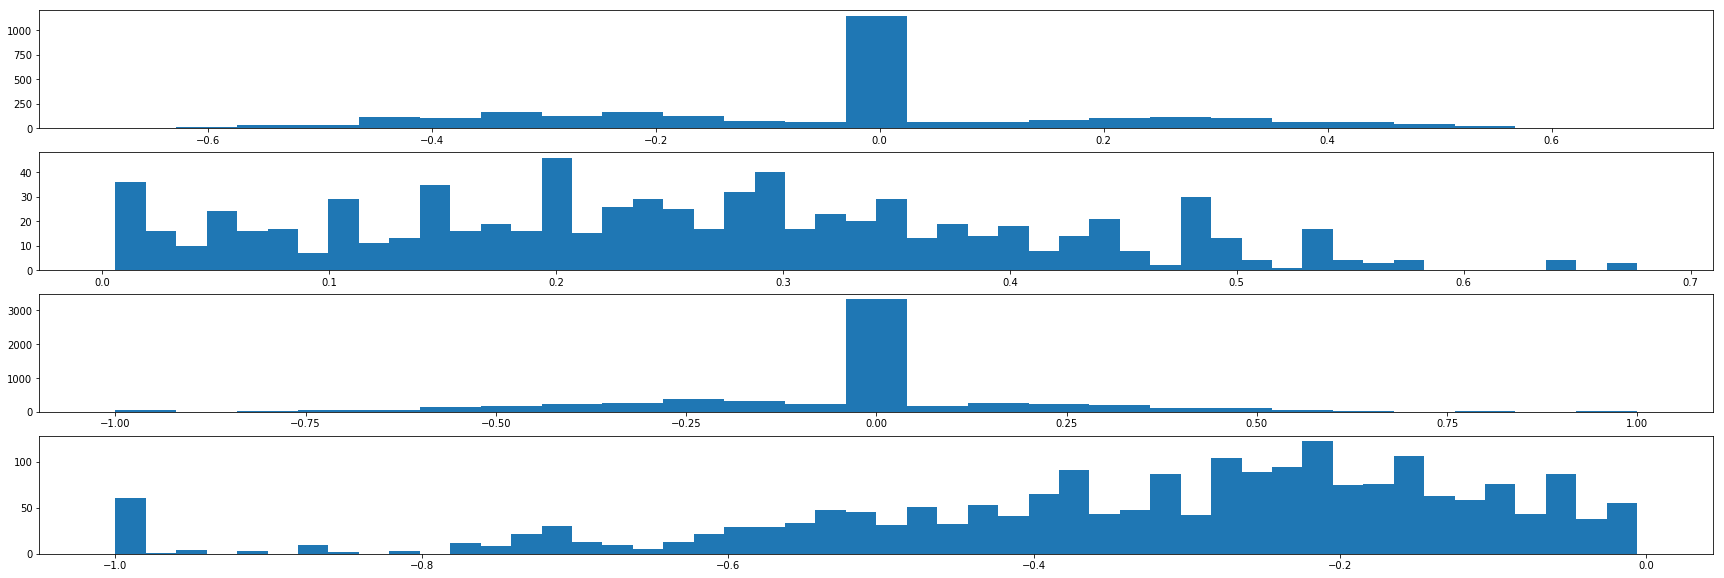

In [3]:
# delete useless data
import matplotlib.pyplot as plt
import random
%matplotlib inline



f,axes = plt.subplots(nrows=4, ncols=1,figsize=(30,10))


# remove noisy data
angle_data = np.array(driving_data_left)[:,3].astype("float")
n, bins, patches = axes[0].hist(angle_data, bins=25)
print("the number of driving data on left lane before delete :"+str(len(driving_data_left)))
noise_left = np.where(np.zeros_like(angle_data)>=angle_data)
driving_data_left=np.delete(driving_data_left,noise_left,axis=0)
print("the number of driving data on left lane after delete :"+str(len(driving_data_left)))


# remove noisy data
angle_data = np.array(driving_data_right)[:,3].astype("float")
n, bins, patches = axes[2].hist(angle_data, bins=25)
print("the number of driving data on right lane before delete :"+str(len(driving_data_right)))
noise_right = np.where(np.zeros_like(angle_data)<=angle_data)
driving_data_right=np.delete(driving_data_right,noise_right,axis=0)
print("the number of driving data on right lane after delete :"+str(len(driving_data_right)))

n, bins, patches = axes[1].hist(driving_data_left[:,3].astype("float"), bins=50)
n, bins, patches = axes[3].hist(driving_data_right[:,3].astype("float"), bins=50)
print(np.shape(driving_data_center))
print(np.shape(driving_data_left))
print(np.shape(driving_data_right))
driving_data=np.concatenate((driving_data_center,driving_data_left,driving_data_right,driving_data_additional),axis=0)

In [4]:
"""
f1,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
n, bins, patches = ax[0].hist(driving_data[:,3].astype("float"), bins=50)
angle_data = np.array(driving_data)[:,3].astype("float")
n, bins, patches = axes[0].hist(angle_data, bins=25)
print("The mean of samples per bin: ", int(np.mean(n)))
print("the number of driving data before delete :"+str(len(driving_data)))
for i in range(len(n)):
    if n[i] > (np.mean(n)+np.std(n)):
        target = np.squeeze(np.argwhere((bins[i]<=angle_data) & (angle_data<=bins[i+1])))
        driving_data=np.delete(driving_data,random.sample(list(target), len(target)-int(np.mean(n))),axis=0)
print("the number of driving data after delete :"+str(len(driving_data)))
n, bins, patches = ax[1].hist(driving_data[:,3].astype("float"), bins=25)

# split data
train_data, validation_data = train_test_split(driving_data, test_size=0.2) 
print(np.shape(train_data))

(10992, 7)


In [5]:
# split data into image and steer angle
# Generator which is called per batch
from sklearn.utils import shuffle
def driving_data_generator(input_data,batch_size): # this input does not mean network input,just generator's input.
    data_length = len(input_data)
    while 1:
        shuffle(input_data)
        for offset in range(0,data_length,batch_size):
            batch_data = input_data[offset:offset+batch_size]
            # hold network input and ouput data
            images = []
            angles = []
            for data in batch_data:

                for is_flip in range(2):
                    if is_flip == 0:
                        for direction in range(3):
                            name = data[direction]
                            image = cv2.imread(name)
                            images.append(image)
                            if direction == 0:
                                angle = float(data[3])
                            elif direction == 1:
                                angle = float(data[3])+0.1
                            else:
                                angle = float(data[3])-0.1
                            angles.append(angle)
                    elif np.abs(float(data[3])) > 0.05:
                        for direction in range(3):
                            name = data[direction]
                            image = cv2.imread(name)
                            image = np.fliplr(image)
                            images.append(image)
                            if direction == 0:
                                angle = (float(data[3]))*(-1)
                            elif direction == 1:
                                angle = (float(data[3])+0.1)*(-1)
                            else:
                                angle = (float(data[3])-0.1)*(-1)
                            angles.append(angle)

            #endfor
            yield np.array(images),np.array(angles)


In [5]:
# define the model
# this model is based on NVIDIA's Network https://devblogs.nvidia.com/deep-learning-self-driving-cars/
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten,Activation,Cropping2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
import math
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.regularizers import l2

## to avoid my GPU specific error.
import tensorflow as tf
from tensorflow.python.keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))
##

# Set our batch size
batch_size=48
height = 80
width = 320
channel =3
# compile and train the model using the generator function
train_generator = driving_data_generator(train_data, batch_size=batch_size)
validation_generator = driving_data_generator(validation_data, batch_size=batch_size)
# I chose elu as activation funciton ,because the authors said that is best in this paper. (https://arxiv.org/pdf/1511.07289v5.pdf)
model = Sequential()
model.add(Cropping2D(cropping=((60,20), (0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=(height,width,channel)))
model.add(Conv2D(24,kernel_size=(5,5),strides=(2,2), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Conv2D(36,kernel_size=(5,5),strides=(2,2), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Conv2D(48,kernel_size=(5,5),strides=(2,2), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Conv2D(64,kernel_size=(3,3), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mse',optimizer='adam')
model.fit_generator(train_generator,
            steps_per_epoch=math.ceil(len(train_data)/batch_size), 
            validation_data=validation_generator, 
            validation_steps=math.ceil(len(validation_data)/batch_size), 
            epochs=20, verbose=1)

model.save('./model_20190820_ver2.h5')
print("finish!")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 80, 320, 3)        0         
_________________________________________________________________
lambda (Lambda)              (None, 80, 320, 3)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 38, 158, 24)       1824      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 38, 158, 24)       96        
_________________________________________________________________
dropout (Dropout)            (None, 38, 158, 24)       0         
_________________________________________________________________
conv2d_1 (Conv2D)    

In [8]:
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('./run_ver2.mp4'))

In [6]:
# define the model
# this model is based on NVIDIA's Network https://devblogs.nvidia.com/deep-learning-self-driving-cars/
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten,Activation,Cropping2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
import math
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.regularizers import l2

## to avoid my GPU specific error.
import tensorflow as tf
from tensorflow.python.keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))
##

# Set our batch size
batch_size=28
height = 80
width = 320
channel =3
# compile and train the model using the generator function
train_generator = driving_data_generator(train_data, batch_size=batch_size)
validation_generator = driving_data_generator(validation_data, batch_size=batch_size)
# I chose elu as activation funciton ,because the authors said that is best in this paper. (https://arxiv.org/pdf/1511.07289v5.pdf)
model = Sequential()
model.add(Cropping2D(cropping=((60,20), (0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=(height,width,channel)))
model.add(Conv2D(24,kernel_size=(5,5),strides=(2,2)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(rate=0.2))
model.add(Conv2D(36,kernel_size=(5,5),strides=(2,2)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(48,kernel_size=(5,5),strides=(2,2)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(64,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(64,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(rate=0.5))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Dense(1))
model.summary()
model.compile(loss='mse',optimizer='adam')
model.fit_generator(train_generator,
            steps_per_epoch=math.ceil(len(train_data)/batch_size), 
            validation_data=validation_generator, 
            validation_steps=math.ceil(len(validation_data)/batch_size), 
            epochs=20, verbose=1)

model.save('./model_20190820_ver2_modified.h5')
print("finish!")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 80, 320, 3)        0         
_________________________________________________________________
lambda (Lambda)              (None, 80, 320, 3)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 38, 158, 24)       1824      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 38, 158, 24)       96        
_________________________________________________________________
activation (Activation)      (None, 38, 158, 24)       0         
_________________________________________________________________
dropout (Dropout)    

393/393 [==============================] - 92s 235ms/step - loss: 0.0150 - val_loss: 0.0124
Epoch 16/20
393/393 [==============================] - 93s 236ms/step - loss: 0.0149 - val_loss: 0.0120
Epoch 17/20
393/393 [==============================] - 92s 235ms/step - loss: 0.0146 - val_loss: 0.0124
Epoch 18/20
393/393 [==============================] - 93s 236ms/step - loss: 0.0144 - val_loss: 0.0122
Epoch 19/20
393/393 [==============================] - 92s 235ms/step - loss: 0.0143 - val_loss: 0.0121
Epoch 20/20
393/393 [==============================] - 92s 235ms/step - loss: 0.0141 - val_loss: 0.0120
finish!
